# Email Spam Detection Project

In [15]:
# Importing Basic libraries

import pandas as pd 
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# importing warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# loading data

df=pd.read_csv('email_spam.csv')
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [17]:
# creating loop for unique and value_counts 

for i in df.columns:
    u=df[i].unique()
    v=df[i].value_counts()
    print('>>>>>>>>>>>>>>>>>>>>>>',i)
    print(u)
    print(v)

>>>>>>>>>>>>>>>>>>>>>> subject
['job posting - apple-iss research center' nan
 'query : letter frequencies for text identification' ...
 'you have been asked to join kiddin' "anglicization of composers ' names"
 're : american - english in australia']
sociolinguistics                                               8
re :                                                           7
conference announcement                                        6
syntax                                                         6
call for papers                                                5
                                                              ..
re : racist linguist plot ( linguist list : vol-5 - 1467 )     1
seduce women instantly !                                       1
pardon the intrusion but you may want to read the following    1
pragmatics : m . roelofs : " hoe bedoel je ? "                 1
int ' l directory of scholars                                  1
Name: subject, Length: 2612, dtyp

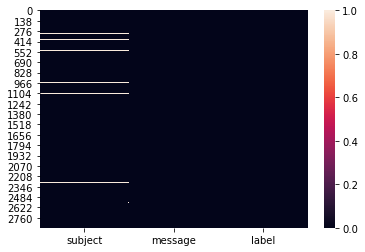

In [18]:
# showing null values

sns.heatmap(df.isnull())

In [19]:
# checking null values

df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [20]:
# droping null value

df=df.dropna(axis=0)
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [21]:
# checking shape 

df.shape

(2831, 3)

In [22]:
# couting the columns message and subject, and creating new columns

df['subject_length']=df['subject'].map(lambda text: len(text))
print(df['subject_length'])

df['message_length']=df['message'].map(lambda text: len(text))
print(df['message_length'])

0       39
2       50
3        4
4       24
5       51
        ..
2888    28
2889    34
2890    34
2891    54
2892    36
Name: subject_length, Length: 2831, dtype: int64
0       2856
2       1435
3        324
4       1046
5       4492
        ... 
2888     262
2889    2163
2890    1039
2891    2949
2892     700
Name: message_length, Length: 2831, dtype: int64


In [23]:
# coverting in numerical values

col=['subject','message']
for i in col:
    df[i]=pd.factorize(df[i])[0]
print(df.head())    

   subject  message  label  subject_length  message_length
0        0        0      0              39            2856
2        1        1      0              50            1435
3        2        2      0               4             324
4        3        3      0              24            1046
5        4        4      0              51            4492


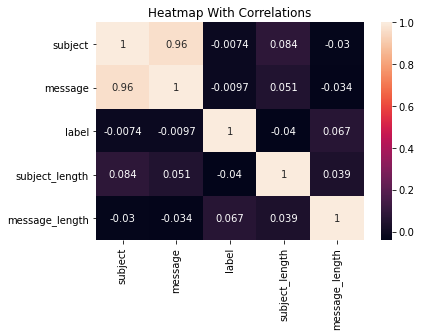

In [24]:
# show correlations with heatmap

sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap With Correlations")
plt.show()

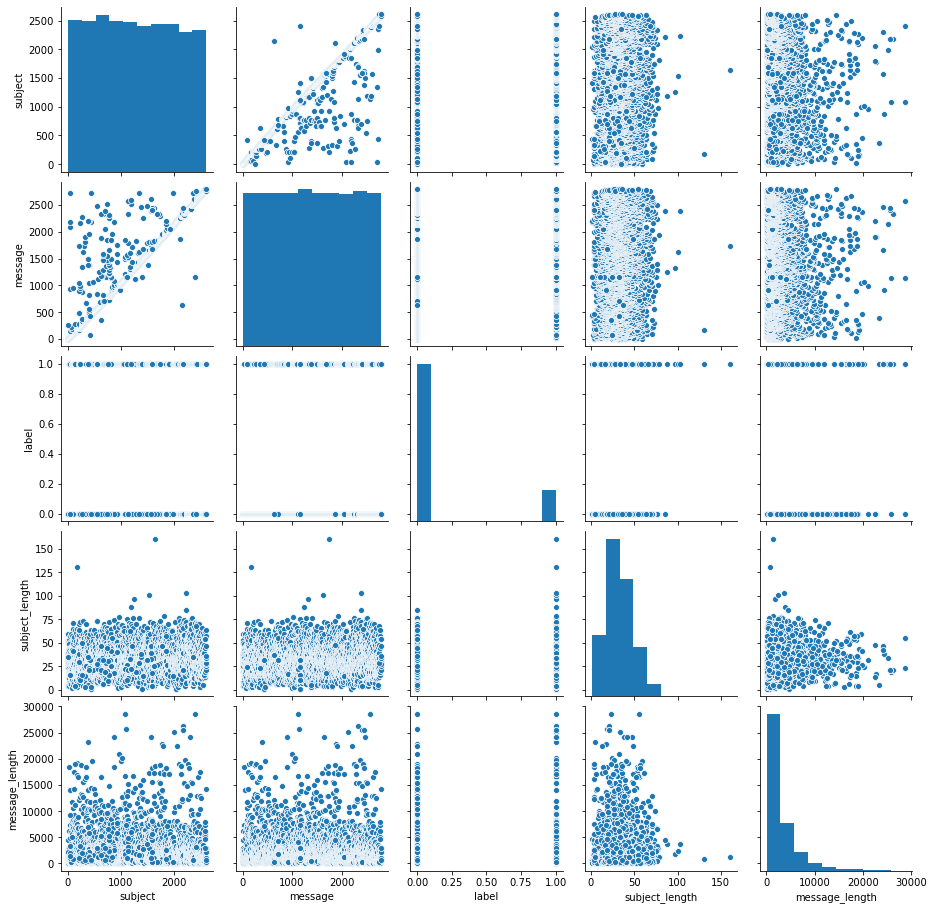

In [25]:
# showing pairplot

sns.pairplot(df)
plt.show()

## MODEL TRAINING

In [27]:
# saparating data into input and output

x= df.drop('label',axis=1)
y=df['label']


In [32]:
# importing model libraries

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

In [49]:
# spliting data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.23)

>>>>>>>>>>>>>>>>>> SVC() <<<<<<<<<<<<<<<<<<<<
AC: 0.8374233128834356
CR:               precision    recall  f1-score   support

           0       0.84      0.99      0.91       549
           1       0.20      0.01      0.02       103

    accuracy                           0.84       652
   macro avg       0.52      0.50      0.46       652
weighted avg       0.74      0.84      0.77       652



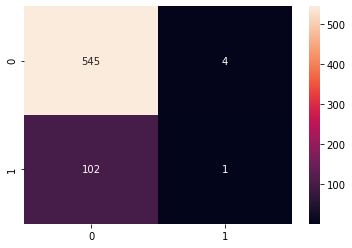

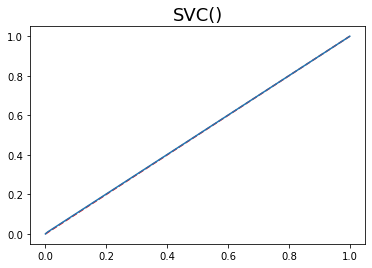



>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<
AC: 0.7760736196319018
CR:               precision    recall  f1-score   support

           0       0.87      0.86      0.87       549
           1       0.31      0.34      0.32       103

    accuracy                           0.78       652
   macro avg       0.59      0.60      0.59       652
weighted avg       0.78      0.78      0.78       652



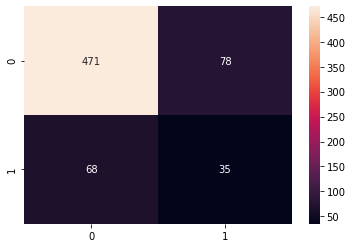

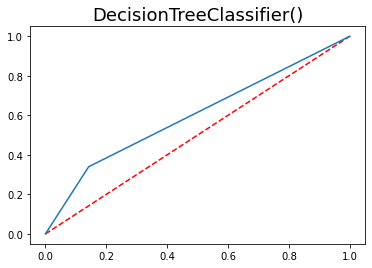



>>>>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<
AC: 0.8236196319018405
CR:               precision    recall  f1-score   support

           0       0.86      0.95      0.90       549
           1       0.37      0.17      0.23       103

    accuracy                           0.82       652
   macro avg       0.61      0.56      0.56       652
weighted avg       0.78      0.82      0.79       652



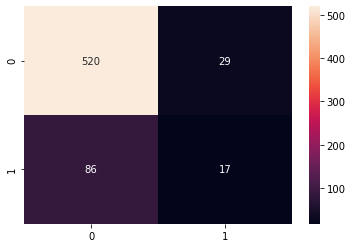

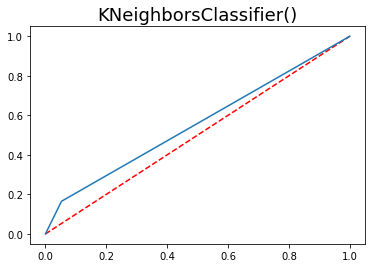



>>>>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<<<<<<
AC: 0.8358895705521472
CR:               precision    recall  f1-score   support

           0       0.84      0.99      0.91       549
           1       0.30      0.03      0.05       103

    accuracy                           0.84       652
   macro avg       0.57      0.51      0.48       652
weighted avg       0.76      0.84      0.77       652



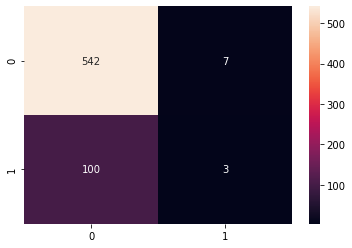

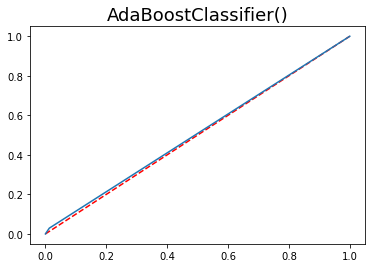



>>>>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<
AC: 0.8420245398773006
CR:               precision    recall  f1-score   support

           0       0.87      0.96      0.91       549
           1       0.50      0.23      0.32       103

    accuracy                           0.84       652
   macro avg       0.68      0.59      0.61       652
weighted avg       0.81      0.84      0.82       652



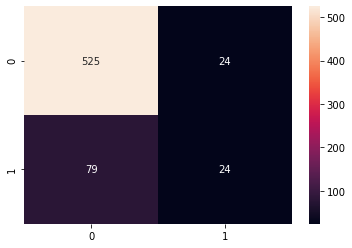

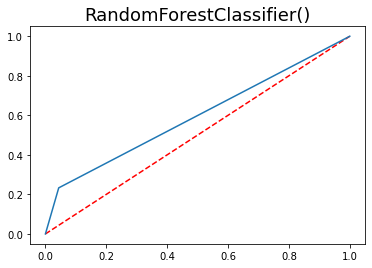



>>>>>>>>>>>>>>>>>> GradientBoostingClassifier() <<<<<<<<<<<<<<<<<<<<
AC: 0.843558282208589
CR:               precision    recall  f1-score   support

           0       0.85      0.99      0.91       549
           1       0.55      0.06      0.11       103

    accuracy                           0.84       652
   macro avg       0.70      0.52      0.51       652
weighted avg       0.80      0.84      0.79       652



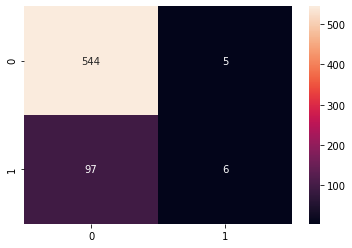

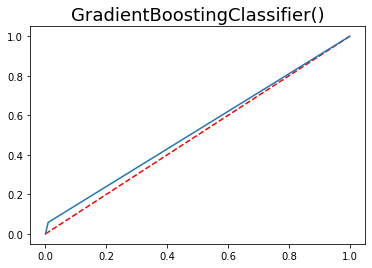



>>>>>>>>>>>>>>>>>> BaggingClassifier() <<<<<<<<<<<<<<<<<<<<
AC: 0.8266871165644172
CR:               precision    recall  f1-score   support

           0       0.86      0.95      0.90       549
           1       0.40      0.19      0.26       103

    accuracy                           0.83       652
   macro avg       0.63      0.57      0.58       652
weighted avg       0.79      0.83      0.80       652



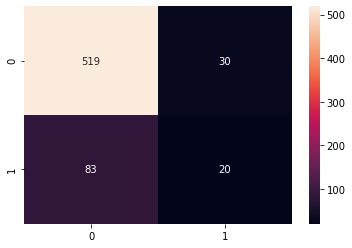

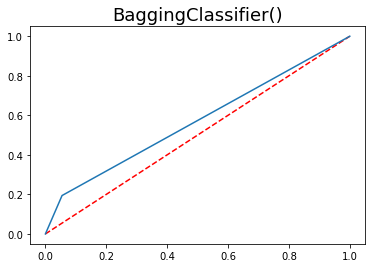

In [50]:
# loop for all modles

modle=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

for i in modle:
    print('>>>>>>>>>>>>>>>>>>',i,'<<<<<<<<<<<<<<<<<<<<')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('AC:',accuracy_score(y_test,pred))
    cm=confusion_matrix(y_test,pred)
    print('CR:',classification_report(y_test,pred))
    
    #plot confusion Matrix
    sns.heatmap(cm,annot=True,fmt='0')
    plt.show()
    
    # ROC curve
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot([0,1],[0,1],'--r')
    plt.plot(fpr,tpr,label=i)
    plt.title(i,fontsize=18)
    plt.show()
    print('\n')

## USEING CROSS VALIDATION SCORE

In [43]:
# checking cross validation score

for i in modle:
    cross=cross_val_score(i,x,y,cv=5)
    print(">>>>>>>>>>>>>>>",i,"<<<<<<<<<<<<<<<")
    print(cross.mean())
    print(cross)
    print("\n")

>>>>>>>>>>>>>>> SVC() <<<<<<<<<<<<<<<
0.83362748580652
[0.83421517 0.83568905 0.83392226 0.83038869 0.83392226]


>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<
0.6013137148590624
[0.28218695 0.77031802 0.36749117 0.77385159 0.81272085]


>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<
0.76794610528415
[0.71252205 0.75795053 0.75971731 0.81448763 0.795053  ]


>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<
0.6988807249113492
[0.1675485  0.83745583 0.83745583 0.8180212  0.83392226]


>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<
0.6900293529268794
[0.21693122 0.82862191 0.77561837 0.82685512 0.80212014]


>>>>>>>>>>>>>>> GradientBoostingClassifier() <<<<<<<<<<<<<<<
0.6928730345691477
[0.16931217 0.83745583 0.79858657 0.82685512 0.83215548]


>>>>>>>>>>>>>>> BaggingClassifier() <<<<<<<<<<<<<<<
0.7048485301724406
[0.27865961 0.82508834 0.78975265 0.81448763 0.81625442]




## USEING GriSearchCV

In [51]:
# useing gridsearch for best model RandomForestClassifier

print("RandomForestClassifier()")
para3={'criterion':['gini','entropy'],'random_state':range(40,80)}

grid3=GridSearchCV(RandomForestClassifier(),para3)
grid3.fit(x_train,y_train)
print(grid3.best_params_)


RandomForestClassifier()
{'criterion': 'entropy', 'random_state': 57}


AC: 0.838957055214724
CR:               precision    recall  f1-score   support

           0       0.86      0.96      0.91       549
           1       0.48      0.19      0.28       103

    accuracy                           0.84       652
   macro avg       0.67      0.58      0.59       652
weighted avg       0.80      0.84      0.81       652



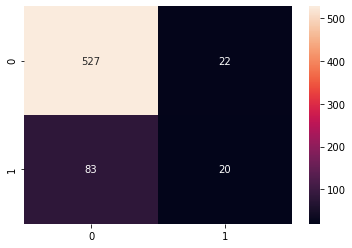

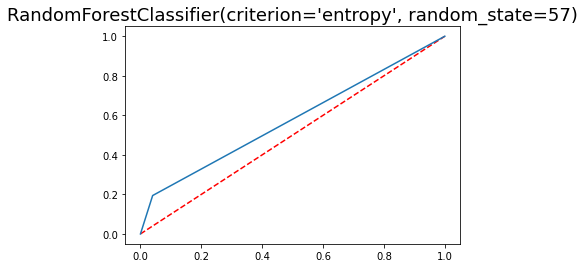

In [54]:
# CREATING FINAL MODEL

rfc=RandomForestClassifier(criterion='entropy',random_state=57)

rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
cm=confusion_matrix(y_test,pred)
print('AC:',accuracy_score(y_test,pred))
print('CR:',classification_report(y_test,pred))

sns.heatmap(cm,annot=True,fmt='0')
plt.show()

fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot([0,1],[0,1],'--r')
plt.plot(fpr,tpr,label=rfc)
plt.title(rfc,fontsize=18)
plt.show()
    

In [56]:
# saveing this model

import joblib

joblib.dump(rfc,'spam_detection_project.pkl')

['spam_detection_project.pkl']

# >>>>>>>>>>>>>>> Done <<<<<<<<<<<<<<<
